In [2]:
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
df = pd.read_csv("aux_data/housing_conditions_ownership.csv")

In [4]:
df.sample(5)

,hh_ids,hh_int_situation,hh_circ_move_why,hh_circ_move_when,hh_circ_problems,hh_inf_wall_material,hh_inf_roof_material,hh_inf_floor_material,hh_inf_cookfuel_source,hh_inf_lighting_source,...,hh_othershamba_N,hh_othershamba1_docu,hh_othershamba1_use,hh_othershamba1_value,hh_othershamba2_docu,hh_othershamba2_use,hh_othershamba2_value,hh_othershamba3_docu,hh_othershamba3_use,hh_othershamba3_value
129,KELDK25,01=Initial questionnaire,"16=Goverment displacement (took land, building...",12/1/2001,02=Lack of doors or inability to lock house,Mud/wood,"Corrugated iron, mabati",Earth/Cowdung,Purchased firewood,Paraffin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,KNBOM19,01=Initial questionnaire,09=Other employment related reason,1/1/1997,"01=Leaky roof or ceilling,04=Pests: mice, rats...",Corrugated Iron Sheet,"Corrugated iron, mabati",Cement/Concrete/Slab,Gas/LPG,Electricity,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,KVIHC13,01=Initial questionnaire,03=Started own household,1/1/1991,"01=Leaky roof or ceilling,04=Pests: mice, rats...",Mud/wood,"Corrugated iron, mabati",Earth/Cowdung,Collected firewood,Paraffin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,KMOMM12,01=Initial questionnaire,"12=Wanted better neighborhood,14=Wanted lower ...",11/1/2011,"01=Leaky roof or ceilling,04=Pests: mice, rats...",Mud/cement,"Corrugated iron, mabati",Cement/Concrete/Slab,Charcoal,Electricity,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,KMOMB06,01=Initial questionnaire,12=Wanted better neighborhood,11/5/2003,"01=Leaky roof or ceilling,04=Pests: mice, rats...",Mud/cement,"Corrugated iron, mabati",Cement/Concrete/Slab,Charcoal,Electricity,...,1.0,"03=Yes, a title deed","02=Used by friends and family,04=Agricultural ...",800000.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(301, 54)

In [6]:
df.describe()

,hh_inf_rooms_habitable,hh_inf_rooms_other,hh_asset_mosqnets_N,hh_asset_towels_N,hh_asset_fryingpan_N,hh_ownership_type,hh_otherprop_N,hh_otherprop1_value,hh_otherprop2_value,hh_otherprop3_value,hh_othershamba_N,hh_othershamba1_value,hh_othershamba2_value,hh_othershamba3_value
count,296.000000,296.000000,295.000000,296.000000,294.000000,295.000000,82.000000,7.300000e+01,6.000000,1.0,45.000000,3.700000e+01,6.000000e+00,2.000000
mean,2.486486,1.425676,2.196610,1.510135,0.755102,2.149153,1.085366,5.939479e+05,191666.666667,100000.0,0.888889,4.850541e+05,4.533333e+05,301750.000000
std,1.345357,1.491632,1.888559,1.667201,0.793247,1.479379,0.612649,1.899143e+06,80104.098938,NaN,0.745356,5.083028e+05,5.394689e+05,421789.194978
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,9.900000e+01,100000.000000,100000.0,0.000000,7.000000e+03,1.000000e+04,3500.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,5.000000e+04,125000.000000,100000.0,0.000000,1.000000e+05,1.525000e+05,152625.000000
50%,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+05,200000.000000,100000.0,1.000000,3.000000e+05,1.800000e+05,301750.000000
75%,3.000000,2.000000,3.000000,2.000000,1.000000,4.000000,1.000000,3.750000e+05,237500.000000,100000.0,1.000000,7.000000e+05,6.500000e+05,450875.000000
max,8.000000,21.000000,10.000000,14.000000,6.000000,6.000000,5.000000,1.500000e+07,300000.000000,100000.0,4.000000,2.000000e+06,1.400000e+06,600000.000000


In [7]:
df["hh_inf_wall_material"].describe()

count          293
unique           7
top       Mud/wood
freq           104
Name: hh_inf_wall_material, dtype: object

In [8]:
df.columns

Index(['hh_ids', 'hh_int_situation', 'hh_circ_move_why', 'hh_circ_move_when',
       'hh_circ_problems', 'hh_inf_wall_material', 'hh_inf_roof_material',
       'hh_inf_floor_material', 'hh_inf_cookfuel_source',
       'hh_inf_lighting_source', 'hh_inf_water_source',
       'hh_inf_rooms_habitable', 'hh_inf_rooms_other', 'hh_inf_toilet_type',
       'hh_inf_toilet_shared', 'hh_inf_housing_type',
       'hh_inf_electricity_access', 'hh_inf_interiorcond',
       'hh_inf_exteriorcond', 'hh_asset_internet_access', 'hh_asset_iron_any',
       'hh_asset_mosqnets_N', 'hh_asset_towels_N', 'hh_asset_fryingpan_N',
       'hh_env_settingdesc', 'hh_env_desc', 'hh_env_dilapbuildings',
       'hh_env_streets', 'hh_env_trash', 'hh_ownership_type',
       'hh_ownership_plotacquisition', 'hh_ownership_houseacquisition',
       'hh_ownership_docu', 'hh_otherprop_any', 'hh_otherprop_N',
       'hh_otherprop1_docu', 'hh_otherprop1_use', 'hh_otherprop1_value',
       'hh_otherprop2_use', 'hh_otherprop2_valu

In [9]:
for col in df.columns:
    print('===========================')
    print(df[col].isnull().value_counts())

False    301
Name: hh_ids, dtype: int64
False    295
True       6
Name: hh_int_situation, dtype: int64
False    288
True      13
Name: hh_circ_move_why, dtype: int64
False    291
True      10
Name: hh_circ_move_when, dtype: int64
False    292
True       9
Name: hh_circ_problems, dtype: int64
False    293
True       8
Name: hh_inf_wall_material, dtype: int64
False    293
True       8
Name: hh_inf_roof_material, dtype: int64
False    294
True       7
Name: hh_inf_floor_material, dtype: int64
False    298
True       3
Name: hh_inf_cookfuel_source, dtype: int64
False    294
True       7
Name: hh_inf_lighting_source, dtype: int64
False    297
True       4
Name: hh_inf_water_source, dtype: int64
False    296
True       5
Name: hh_inf_rooms_habitable, dtype: int64
False    296
True       5
Name: hh_inf_rooms_other, dtype: int64
False    296
True       5
Name: hh_inf_toilet_type, dtype: int64
False    286
True      15
Name: hh_inf_toilet_shared, dtype: int64
False    292
True       9
Name: hh_

### Why does this look so weird?

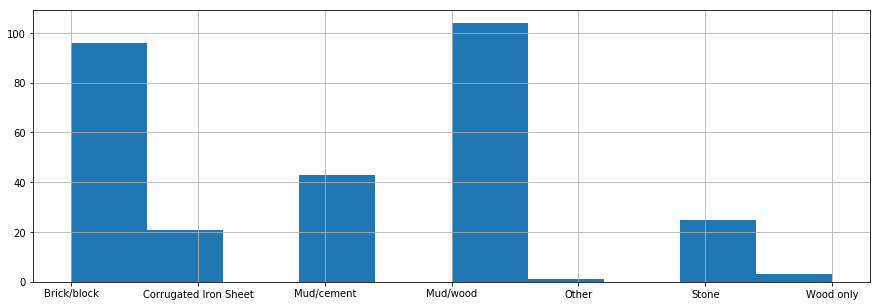

In [10]:
df["hh_inf_wall_material"].hist(figsize=(15,5))

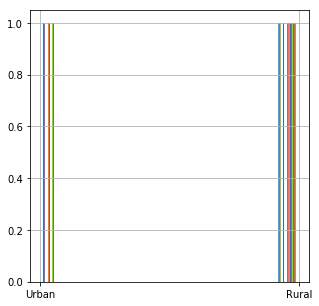

In [34]:
df["hh_env_settingdesc"].hist(figsize=(5,5))

In [32]:
# again this just took too long
#for col in df.columns:
#    if col == "hh_ids":
#        continue
#    df[col].hist()
#    break

## Let's try the seaborn function.

(array([ 0.,  0.,  0.,  0.,  0., 20.,  0.,  0.,  0.,  0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

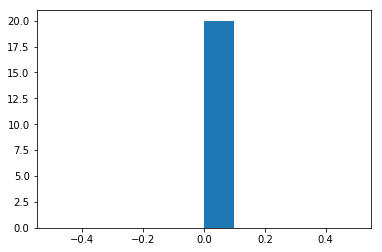

In [47]:
plt.hist(np.zeros(20))

In [69]:
np.invert(df["hh_inf_wall_material"].isnull()).head()

0    False
1     True
2     True
3     True
4     True
Name: hh_inf_wall_material, dtype: bool

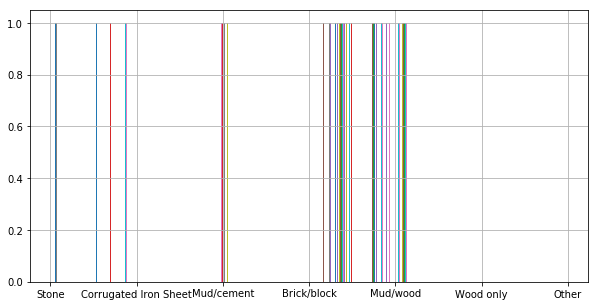

In [68]:
df[np.invert(df["hh_inf_wall_material"].isnull())]["hh_inf_wall_material"].hist(figsize=(10,5))

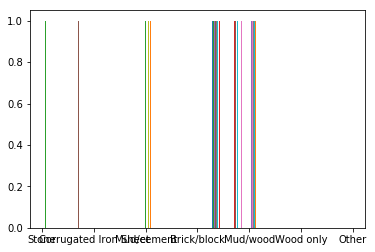

In [70]:
#This does not work either.
plt.hist(x=df[np.invert(df["hh_inf_wall_material"].isnull())]["hh_inf_wall_material"]);

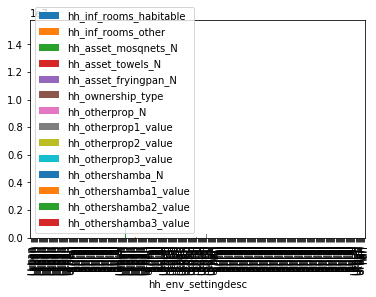

In [45]:
df.plot(kind="bar",x="hh_env_settingdesc")